Les méthodes factorielles ont pour but de traiter et visualiser des données multidimensionnelles. La prise en compte simultanée de l'ensemble des variables est un problème difficile, rendu parfois plus simple car l'information apportée par les variables est redondante. Les méthodes factorielles visent alors à exploiter cette redondance pour tenter de remplacer les variables initiales par un nombre réduit de nouvelles variables, conservant au mieux l'information initiale.

Les principales méthodes de ce type incluent l'analyse factorielle des correspondances, l'analyse des correspondances multiples, l'analyse factorielle d'un tableau de distance (pour les tableaux de proximité) ou encore l'analyse factorielle discriminante. Ces méthodes sont proposées en annexe de ce cours.

Nous nous intéressons ici à une méthode de réduction de dimension linéaire sur données quantitatives, l'analyse en composantes principales.

# Analyse en composantes principales

```{index} ACP
```
```{index} Analyse ; composantes principales
```

Pour les données quantitatives, l'Analyse en Composantes Principales (ACP) est l'une des méthodes les plus utilisées. Elle considère que les nouvelles variables sont des combinaisons linéaires des variables initiales, non corrélées. 

![](./images/acpintro.png)


Dans la suite, les données seront des tableaux $n\times d$ de variables quantitatives, une ligne étant un individu, et les colonnes décrivant les paramètres mesurés. Les observations de $d$ variables sur $n$ individus sont donc rassemblées dans une matrice ${\bf X}\in\mathcal{M}_{n,d}(\mathbb{R})$ .  On notera $x^j$ la j-ème variable, identifiée par la j-ème colonne ${\bf X_{\bullet,j}}$ de ${\bf X}$, et $\mathbf{e_i}$ le i-ème individu (i.e. ${\bf X_{i,\bullet}^T}$).
 
## Principe de la méthode
## Pré-traitement du tableau
 En analyse en composantes principales, on raisonne souvent sur des variables centrées et/ou réduites.
### Données centrées
 Notons $\mathbf{g} = \left ( \bar{x}^1\cdots \bar{x}^d\right )$ le vecteur des moyennes arithmétiques de chaque variable (centre de gravité) : 
 
 $\mathbf{g}={\bf X^TD\mathbf{1}}$
 
 où ${\bf D}$ est une matrice diagonale de poids,  chaque $d_{ii}$ donnant l'importance de l'individu $i$ dans les données (le plus souvent ${\bf D}=\frac{1}{n}{ \mathbb{I}}$),  et $\mathbf{1}$ est le vecteur de $\mathbb{R}^n$ dont toutes les composantes sont égales à 1. Le tableau ${\bf Y}={\bf X}-\mathbf{1}\mathbf{g}^T=({ \mathbb{I}}-\mathbf{1}\mathbf{1}^T{\bf D}){\bf X}$ est le tableau centré associé à ${\bf X}$.

### Données réduites
 La matrice de variance/covariance des données centrées est égale à 
 ${\bf V} = {\bf X^TDX} - \mathbf{g}\mathbf{g^T} = {\bf Y^TDY}$.

 Si on note ${\bf D_{1/\sigma}}$ la matrice diagonale des inverses des écarts-types des variables, alors  ${\bf Z}={\bf YD_{1/\sigma}}$ 
 est la matrice des données centrées réduites. La matrice ${\bf R}={\bf D_{1/\sigma}VD_{1/\sigma}}={\bf Z^TDZ}$ 
 est la matrice de corrélation des données et résume la structure des dépendances linéaires entre les $d$ variables.
 

## Projection des individus sur un sous-espace
Le principe de la méthode est d'obtenir une représentation approchée du nuage des $n$ individus dans un sous-espace $F_k$ de dimension faible. Ceci s'effectue par un mécanisme de projection.

Le choix de l'espace de projection est dicté par le critère suivant, qui revient à déformer le moins possible les distances en projection : le sous-espace de dimension $k$ recherché est tel que la moyenne des carrés des distances entre projections soit la plus grande possible. En définissant l'inertie d'un nuage de points comme la moyenne pondérée des carrés des distances au centre de gravité, le critère revient alors à maximiser l'inertie du nuage projeté sur $F_k$.

Soit ${\bf P}$ la projection orthogonale sur $F_k$. Le nuage de points projeté est associé au tableau ${\bf XP^T}$ puisque chaque individu $\mathbf{e_i}$ se projette sur $F_k$ selon un vecteur colonne $\mathbf{Pe_i}$ ou ligne $\mathbf{e_i P^T}$. 

La matrice de variance du tableau ${\bf XP^T}$ est, dans le cas où les variables sont centrées :
${\bf (XP^T)^TD(XP^T) }= {\bf PVP^T}$.
L'inertie du nuage projeté est donc égale à $Tr({\bf PVP^TM})$, où ${\bf M}$ est une matrice symétrique définie positive de taille $d$, définissant la distance entre deux individus

$d^2(\mathbf{e_i},\mathbf{e_j}) = (\mathbf{e_i}-\mathbf{e_j})^T{\bf M}(\mathbf{e_i}-\mathbf{e_j})$

Mais 

$\begin{eqnarray*}
Tr({\bf PVP^TM})&=&Tr({\bf PVMP})\quad \textrm{car }{\bf P^TM}={\bf MP}\\
&=& Tr({\bf VMP^2})\quad \textrm{car }Tr({\bf AB})=Tr({\bf BA})\\
&=&Tr({\bf VMP})\quad \textrm{car } P\textrm{ est une projection}
\end{eqnarray*}$

Le problème posé est donc de trouver la projection ${\bf P}$, de rang $k$ maximisant $Tr({\bf VMP})$. La projection ${\bf P}$ réalisant cette optimisation donnera alors $F_k$.

L'analyse en composantes principales consiste alors, de manière itérative, à chercher un sous-espace de dimension 1 d'inertie maximale, puis le sous-espace de dimension 1 orthogonal au précédent d'inertie maximale et ainsi de suite. Elle s'appuie sur le résultat suivant :

```{prf:theorem}

Soit $F_k$ un sous-espace portant l'inertie maximale. Alors le sous-espace de dimension $k+1$ portant l'inertie maximale est la somme directe de $F_k$ et de la droite orthogonale à $F_k$ portant l'inertie maximale.
```
## Elements principaux

```{index} ACP ; axes principaux
```

```{index} Composantes principales
```

### Axes principaux
Rechercher un sous-espace de dimension 1 d'inertie maximale revient à rechercher une droite de $\mathbb{R}^n$ passant par le centre de gravité des données $\mathbf{g}$ maximisant l'inertie du nuage projeté sur cet axe. Soit $\mathbf{a}$ un vecteur directeur de cette droite. La projection orthogonale sur la droite est définie par la matrice de projection 

$\mathbf P=\frac{\mathbf{a}\mathbf{a}^T{\bf M}}{\mathbf{a}^T{\bf M}\mathbf{a}}$

L'inertie du nuage projeté sur $Lin(\mathbf{a})$ vaut alors
$\begin{eqnarray*}
Tr({\bf VMP})&=&Tr\left ({\bf VM}\frac{\mathbf{a}\mathbf{a}^T{\bf M}}{\mathbf{a}^T{\bf M}\mathbf{a}}\right )\\
&=& \frac{1}{\mathbf{a^T}{\bf M}\mathbf{a}}Tr({\bf VM}\mathbf{a}\mathbf{a^T}{\bf M})\\
&=& \frac{1}{\mathbf{a^T}{\bf M}\mathbf{a}}Tr(\mathbf{a^T}{\bf MVM}\mathbf{a})\quad \text{car } Tr(\mathbf{AB})=Tr(\mathbf{BA})\\
&=& \frac{1}{\mathbf{a^T}{\bf M}\mathbf{a}}\mathbf{a^T}{\bf MVM}\mathbf{a}\quad \text{car } \mathbf{a^T}{\bf MVM}\mathbf{a}\in\mathbb{R}
\end{eqnarray*}$

La matrice ${\bf MVM}$ est la matrice d'inertie du nuage (égale à la matrice de variance-covariance si ${\bf M}=\mathbb I$).  Maximiser cette quantité revient à annuler sa dérivée par rapport à $\mathbf{a}$ d'où :

$
\frac{d}{d\mathbf{a}}\frac{\mathbf{a^T}{\bf MVM}\mathbf{a}}{\mathbf{a^T}{\bf M}\mathbf{a}}=\frac{(\mathbf{a^T}{\bf M}\mathbf{a})2{\bf MVM}\mathbf{a}-(\mathbf{a^T}{\bf MVM}\mathbf{a})2{\bf M}\mathbf{a}}{(\mathbf{a^T}{\bf M}\mathbf{a})^2}
$
et donc 

${\bf MVM}\mathbf{a}=\left (\frac{\mathbf{a^T}{\bf MVM}\mathbf{a}}{\mathbf{a^T}{\bf M}\mathbf{a}} \right ){\bf M}\mathbf{a}$

soit ${\bf VM}\mathbf{a}=\lambda \mathbf{a}$ car ${\bf M}$ est de rang plein. Donc $\mathbf{a}$ est vecteur propre de ${\bf VM}$, et $\lambda$ est la plus grande des valeurs propres de ${\bf VM}$. Or ${\bf M}$ est symétrique, elle est diagonalisable sur une base de vecteurs propres orthonormés et on a le résultat suivant :

```{prf:theorem}
Le sous-espace $F_k$ de dimension $k$ portant l'inertie maximale est engendré par les $k$ premiers vecteurs propres de ${\bf VM}$
```
Les droites portées par ces vecteurs propres sont les axes principaux. Dans la suite on supposera $\mathbf{a}$ $\mathbf M$-normé.

### Facteurs principaux

```{index} ACP ; Facteurs principaux
```
```{index} Facteurs principaux
```
On associe à  $Lin(\mathbf{a})$ la forme linéaire $\mathbf{u}$, coordonnée orthogonale sur l'axe $Lin(\mathbf{a})$. Le vecteur $\mathbf{u}$ définit une combinaison linéaire des variables descriptives $x^1\cdots x^d$. A l'axe principal $\mathbf{a}$ est associé le facteur principal $\mathbf{u}=\mathbf{Ma}$. Puisque $\mathbf{a}$ est vecteur propre de ${\bf VM}$, on peut alors écrire 

${\bf MVM}\mathbf{a}=\lambda {\bf M}\mathbf{a}$

et donc ${\bf MV}\mathbf{u}=\lambda \mathbf{u}$.  Les facteurs principaux sont donc les vecteurs propres de ${\bf MV}$

### Composantes principales
Les composantes principales sont les éléments de $\mathbb{R}^n$ définis par $\mathbf{c_i}=\mathbf{Xu_i}$. Ce sont donc les vecteurs coordonnées des projections orthogonales des individus sur les axes propres $\mathbf{a_i}$.  Ce sont donc les combinaisons linéaires des $x^1\cdots x^p$ de variance maximale sous la contrainte $\mathbf{u_i}^T{\bf M}\mathbf{u_i}=1$, et cette variance est égale à la valeur propre $\lambda_i$ associée à $\mathbf{a_i}$.

En pratique, l'analyse en composantes principales consiste à calculer les $\mathbf{u}$ par diagonalisation de ${\bf MV}$, puis à calculer les $\mathbf{c}=\mathbf{Xu}$. Le calcul explicite des vecteurs propres $\mathbf{a}$ n'a que peu d'intérêt.

### Reconstitution
Il est possible de reconstituer le tableau ${\bf X}$ centré des données (ou une approximation par une matrice de rang $k$) en utilisant les composantes. En effet, puisque $\mathbf{Xu_j}=\mathbf{c_j}$ on a 

${\bf X}\displaystyle\sum_j \mathbf{u_j}\mathbf{u_j}^T{\bf M^{-1}} = \displaystyle\sum_j\mathbf{c_j}\mathbf{u_j}^T{\bf M^{-1}}$

Mais $\displaystyle\sum_j \mathbf{u_j}\mathbf{u_j}^T{\bf M^{-1}}=\mathbb{I}$  car les $\mathbf{u_j}$ sont orthonormés pour la métrique ${\bf M^{-1}}$ donc 

${\bf X}=\displaystyle\sum_j\mathbf{c_j}\mathbf{u_j}^T{\bf M^{-1}}$
et si l'on s'intéresse à l'approximation de ${\bf X}$ on ne somme que les $k$ premiers termes.

A noter que lorsque ${\bf M}=\mathbb{I}, {\bf X}= \displaystyle\sum_j\sqrt{\lambda_j}\mathbf{z_j}\mathbf{v_j^T}$ où les $\mathbf{z_j}$ sont les vecteurs propres unitaires de ${\bf XX^T}$ et les $\mathbf{v_j}$ les vecteurs propres unitaires de ${\bf X^TX}$ (décomposition dite en valeurs singulières).
 
## Interprétation des résultats
## Quelle dimension pour $F_k$ ?
Le but premier de l'ACP est de réduire la dimension pour permettre une visualisation efficace des données, tout en préservant l'information (ici représentée par la variance du nuage de points).  Il faut donc se doter d'outils permettant de répondre à la question : quelle dimension pour $F_k$ ? Il n'y a pas de réponse théorique satisfaisante, l'essentiel étant d'avoir une représentation suffisamment expressive pour permettre une interprétation correcte du nuage de points.
En préambule, il convient de remarquer que la réduction de dimension ne sera possible que si les variables $x^1\cdots x^d$ ne sont pas indépendantes.


### Critère théorique
On détermine ici si les valeurs propres sont significativement différentes entre elles à partir d'un certain rang : si la réponse est négative on conserve les
premières valeurs propres.

On fait l'hypothèse que les $n$ individus proviennent d'un tirage aléatoire dans une population gaussienne  où $\lambda_{k+1}=\cdots =\lambda_{d}$. Si l'hypothèse est vérifiée, la moyenne arithmétique $\alpha$ des $d-k$ dernières valeurs propres et leur moyenne géométrique $\gamma$ sont peu différentes. On admet que :

$c=\left ( n-\frac{2p+11}{6}\right )(d-k) ln\frac{\alpha}{\gamma}$
suit une loi du $\chi^2$ de degré de liberté $\frac{(d-k+2)(d-k-1)}{2}$ et on rejette l'hypothèse d'égalité des $d-k$ valeurs propres si $c$ est trop grand.

### Pourcentage d'inertie
Le critère couramment utilisé est le pourcentage d'inertie totale expliquée, qui s'exprime sur les $k$ premiers axes par :

$$\frac{\displaystyle\sum_{j=1}^k \lambda_j}{\displaystyle\sum_{j=1}^d \lambda_j}$$

Un seuil par exemple de 90\% d'inertie totale expliquée donne une valeur de $k$ correspondante. Attention cependant, le pourcentage d'inertie doit faire intervenir le nombre de variables initiales.

![](./images/scree.png)

### Mesures locales
Le pourcentage d'inertie expliquée est un critère global qui doit être complété par d'autres considérations. Supposons que le plan $F_2$ explique une part importante d'inertie, et que, en projection sur ce plan, deux individus soient très proches. Cette proximité peut être illusoire si les deux individus se trouvent éloignés dans l'orthogonal de $F_2$. Pour prendre en compte ce phénomène, il faut envisager pour chaque individu $\mathbf{e_i}$ la qualité de sa représentation, souvent exprimée par le **cosinus de l'angle entre le plan principal et le vecteur $\mathbf{e_i}$**. Si ce cosinus est grand, $\mathbf{e_i}$ est voisin du plan, on peut  alors examiner la position de sa projection sur le plan par rapport à d'autres points.

Dans la figure suivante, ${\bf e_i} $ et ${\bf e_j}$ se projettent sur $F_2$ en ${\bf p}$ mais sont éloignés dans $F_2^\perp$.

![](./images/proj.png)



### Critères empiriques

```{index} Kaiser ; critère
```
Lorsqu'on travaille sur données centrées réduites, on retient les composantes principales correspondant à des valeurs propres supérieures à 1 (critère de Kaiser) : en effet les composantes principales $c_j$ étant des combinaisons linéaires des $z-j$ de variance maximale $V(c_j)=\lambda$, seules les composantes de variance supérieure à celle des variables initiales présentent un intérêt.


## Interprétation des résultats : exemple

Une analyse en composantes principales est réalisée sur un jeu de données composé de $d$=9 indicateurs de qualité pour $n$=329 villes américaines. Les paragraphes suivants sont illustrés par ces données.

### Corrélation variables-facteurs
Pour donner du sens aux composantes principales $\mathbf{c}$, il faut les relier aux variables initiales $x^j$ en calculant les coefficients de corrélation linéaire  $r(\mathbf{c},x^j)$ et en seuillant ces coefficients en valeur absolue.

Lorsque l'on travaille sur des données centrées réduites (métrique $\mathbf D_{1/\sigma}$), le calcul de $r(\mathbf{c},x^j)$ se réduit à 

$r(\mathbf{c},x^j)=\frac{\mathbf{c}^T\mathbf D\mathbf{z^j}}{\sqrt{\lambda}}$

Or $\mathbf{c}=Z\mathbf{u}$ où $\mathbf{u}$, facteur principal associé à $\mathbf{c}$, est vecteur propre de la matrice de corrélation $\mathbf R$ associé à $\lambda$. Donc

$r(\mathbf{c},x^j)=\frac{\mathbf{u}^T\mathbf Z^T\mathbf D\mathbf{z^j}}{\sqrt{\lambda}}=\frac{(\mathbf{z^j})^T\mathbf D\mathbf Z\mathbf{u}}{\sqrt{\lambda}}$

$(\mathbf{z^j})^T\mathbf D\mathbf Z$ est la $j^e$ ligne de $\mathbf Z^T\mathbf D\mathbf Z=\mathbf R$ donc $(\mathbf{z^j})^T\mathbf D \mathbf Z \mathbf{u}$ est la $j^e$ composante de $\mathbf R\mathbf{u}=\lambda \mathbf{u}$ d'où

$r(\mathbf{c},x^j)=\sqrt{\lambda}u_j$


Ces calculs s'effectuent pour chaque composante principale. Pour un couple de composantes principales $\mathbf{c_1}$ et $\mathbf{c_2}$ par exemple on représente fréquemment les corrélations sur une figure appelée « cercle des corrélations» où chaque variable $x^j$ est repérée par un point d'abscisse $r(\mathbf{c_1},x^j)$ et d'ordonnée $r(\mathbf{c_2},x^j)$.

![](./images/cercle.png)


```{prf:remark}
:class: dropdown
Attention de ne pas interpréter des proximités entre points variables, si ceux-ci ne sont pas proches de la circonférence.
```

Notons que dans le cas de la métrique $D_{1/\sigma}$, le cercle des corrélations est la projection de l'ensemble des variables centrées-réduites sur le sous-espace engendré par $\mathbf{c_1},\mathbf{c_2}$. En ce sens, le cercle de corrélation est le pendant, dans l'espace des variables, de la projection des individus sur le premier plan principal. 

## Positionnement des individus
Dire que $\mathbf{c_1}$ est très corrélée à $x^j$ signifie que les individus ayant une forte coordonnée positive sur l'axe 1 sont caractérisés par une valeur de $x^j$ nettement supérieure à la moyenne. 

Il est très utile aussi de calculer pour chaque axe la contribution apportée par les divers individus à cet axe. Si $c_{ki}$ est la valeur de la composante $k$ pour le $i^e$ individu, alors par construction 

$$\displaystyle\sum_{i=1}^np_ic_{ki}^2=\lambda_k$$

où $p_i$ est le poids de l'individu $i$. On appelle alors contribution de l'individu $i$ à la composante $\mathbf{c_k}$ la quantité $\frac{p_ic_{ki}^2}{\lambda_k}$. Dans le cas où le poids est différent de $1/n$ (certains individus sont "plus importants" que d'autres), la contribution est riche d'interprétation. Dans le cas contraire, elle n'apporte rien de plus que les coordonnées de l'individu.

On peut alors positionner les individus sur les sous-espaces des premières composantes principales (plans factoriels). La figure suivante présente le positionnement de 329 villes américaines, où les 9 variables de qualité de vie précédentes ont été mesurées. Par soucis de lisibilité, seul les villes qui contribuent le plus à la création de la première composante principale ont leurs noms inscrits.

![](./images/individus.png)


On peut également superposer les deux informations précédentes pour corréler le positionnement des villes selon les variables originales. La figure suivante présente les 329 villes précédentes, plongées dans $F_3$, les  anciennes variables étant matérialisées par des vecteurs dont la direction et la norme indiquent à quel point chaque variable contribue aux 3 premières composantes principales.

![](./images/biplot.png)


Il n'est pas souhaitable, et ceci surtout pour les premières composantes,  qu'un individu ait une contribution excessive car cela serait un facteur d'instabilité, le fait de retirer cet individu modifiant profondément le résultat de l'analyse. Si ce cas se produisait il y aurait intérêt à effectuer l'analyse en éliminant cet individu puis en le mettant en élément supplémentaire, s'il ne s'agit pas d'une donnée erronée qui a été ainsi mise en évidence.


## Facteur de taille, facteur de forme
Le théorème de Frobenius stipule qu'une matrice symétrique n'ayant que des termes positifs admet un premier vecteur propre dont toutes les composantes sont de même signe. Si ce signe est positif, la première composante est alors corrélée positivement avec toutes les variables et les individus sont rangés sur l'axe 1 par valeurs croissantes de l'ensemble des variables. Si de plus les corrélations entre variables sont du même ordre de grandeur, la première composante principale est proportionnelle à la moyenne des variables initiales. Cette première composante définit alors un facteur de taille.

La deuxième composante principale différencie alors des individus de "taille" semblable, on l'appelle souvent facteur de forme.

## Ajout de variable et ou d'individu
Toutes les interprétations précédentes expliquent les résultats à l'aide des données initiales, qui ont permis de les calculer. On risque alors de prendre pour une propriété intrinsèque des données un simple artefact de la méthode (par exemple il existe de fortes corrélations entre la première composante principale et certaines variables, puisque $\mathbf{c_1}$ maximise $\sum_j r^2(\mathbf{c},x^j)$).

En revanche une forte corrélation entre une composante principale et une variable qui n'a pas servi à l'analyse sera significative. D'où la pratique courante de partager en deux groupes l'ensemble des variables : d'une part les variables actives qui servent à déterminer les axes principaux, d'autre part les variables passives ou supplémentaires que l'on relie a posteriori aux composantes principales. On distingue alors les variables supplémentaires suivant leur type, numérique (à placer dans les cercles de corrélation) ou qualitative (donnée d'une partition des $n$ individus en $k$ classes).

## Exemple
On étudie les consommations annuelles en 1972, exprimées en devises, de 8 denrées alimentaires (les variables), les individus étant 8 catégories socio-professionnelles (CSP) . Les données sont des moyennes par CSP : 

$
\begin{array}{|c|cccccccc|}
\hline
  &PAO  &PAA  &VIO& VIA&  POT&  LEC &RAI& PLP\\
\hline
AGRI  &167  &1  &163& 23& 41  &8& 6 &6\\
SAAG  &162& 2 &141& 12  &40 &12&  4&  15\\
PRIN  &119& 6 &69 &56 &39&  5 &13 &41\\
CSUP  &87 &11 &63 &111& 27& 3 &18 &39\\
CMOY  &103  &5  &68 &77 &32&  4 &11 &30\\
EMPL  &111  &4  &72 &66 &34&  6 &10 &28\\
OUVR  &130  &3  &76 &52 &43&  7 &7  &16\\
INAC  &138  &7  &117  &74&  53& 8 &12 &20\\
\hline
\end{array}
$

avec les notations suivantes : 

AGRI = Exploitants agricoles, SAAG= Salariés agricoles,   PRIN = Professions indépendantes, CSUP = Cadres supérieurs, CMOY= Cadres moyens, EMPL= Employés, OUVR = Ouvriers, INAC = Inactifs.

et 

PAO = Pain ordinaire, PAA = Autre pain, VIO = Vin ordinaire, VIA=Autre vin, POT= Pommes de terre, LEC=Légumes secs, RAI=Raisin de table, PLP= Plats préparés.

La matrice de corrélation des variables est alors

$\begin{pmatrix}
   1.0000   &  -.7737    & 0.9262    & -.9058    & 0.6564  &   0.8886   &  -.8334  &   -.8558\\
    -.7737    & 1.0000    & -.6040    & 0.9044    & -.3329    & -.6734    & 0.9588    & 0.7712\\
   0.9262    & -.6040    & 1.0000    & -.7502    & 0.5171    & 0.7917   &  -.6690     &-.8280\\
  -.9058    & 0.9044    & -.7502    & 1.0000    & -.4186    & -.8386    & 0.9239     &0.7198\\
    0.6564   &  -.3329    & 0.5171    & -.4186    & 1.0000   &  0.6029   &  -.4099    & -.5540\\
  0.8886   &  -.6734    & 0.7917   &  -.8386    & 0.6029   &  1.0000   &  -.8245    & -.7509\\
  -.8334    & 0.9588    & -.6690    & 0.9239    & -.4099    & -.8245    & 1.0000     &0.8344\\
   -.8558    & 0.7712   &  -.8280   &  0.7198   &  -.5540    & -.7509  &   0.8344    & 1.0000\\
\end{pmatrix}$

et son analyse spectrale donne

$\begin{array}{|c||c|c|c|}
\hline
                      &    \textrm{Valeur propre}  &      \textrm{Variance expliquée}  &  \textrm{Variance cumulative expliquée}\\
\hline
                     1  &  6.20794684      &      0.7760  &      0.7760\\
                     2   & 0.87968139      &      0.1100    &    0.8860\\
                     3    &0.41596112    &        0.0520      &  0.9379\\
                     4    &0.30645467    &        0.0383      &  0.9763\\
                     5    &0.16844150    &        0.0211      &  0.9973\\
                     6    &0.01806771    &       0.0023       & 0.9996\\
                     7    &0.00344677    &       0.0004       & 1.0000\\
                     8    &0.00000000        &              0.0000      &  1.0000\\
\hline
\end{array}$


Le critère de Kaiser  conduit à sélectionner un seul axe, qui retient 77\% de l'inertie totale. L'axe 2 retenant 11\% de l'inertie, il peut être  intéressant de le rajouter à l'étude pour expliquer près de 90\% de la variance des données. Les suivantes représentent les variables et les individus dans le plan des deux premiers vecteurs propres.

![](./images/ex1.png)


L'interprétation de ce plan se fait séquentiellement, pour chaque axe et chaque nuage de points, en regardant les contributions à la formation des axes: 

- Axe 1 : 

1- **Variables** :  les variables contribuant le plus à la formation de l'axe 1 sont celles dont les coordonnées sur cet axe sont proches de 1 en valeur absolue. 
PAA et VIO sont très proches de la contribution moyenne, on les intègre donc dans l'interprétation de l'axe si elles vont dans le sens de l'interprétation que l'on peut en faire, sans elles. L'axe 1 oppose les individus consommant du pain ordinaire, des légumes secs (et éventuellement du vin ordinaire) à ceux qui consomment du raisin, du vin (éventuellement du pain) plus sophistiqué et des plats préparés. L'axe 1, et donc la première composante principale, mesure la répartition entre aliments ordinaires bon marché et aliments plus recherchés.

Toutes les variables sont bien représentées sur l'axe (la qualité de représentation est égale à la coordonnée au carré). D'un point de vue graphique, une variable bien représentée est proche du bord du cercle des corrélation et à proximité de l'axe. La première composante principale explique donc correctement tous les types de consommations alimentaires.

2- **Individus** : de même, les individus contribuant le plus à la formation de l'axe 1 sont ceux dont les coordonnées sur cet axe sont les plus élevées en valeur absolue. Le premier axe met donc en opposition les agriculteurs et les cadres supérieurs quant à leurs habitudes alimentaires. Les autres catégories socio-professionnelles, assez bien représentées sur l'axe à l'exception des inactifs (cf. contributions des individus sur l'axe 1), s'échelonnent suivant la hiérarchie habituelle. Elles sont bien expliquées par l'axe.


- Axe 2 : 

1- **Variables** : L'axe 2 est défini par les variables POT et PAA. Compte tenu de la différence de contribution existant entre ces deux variables, de la contribution élevée de POT (55\%), et de la qualité de représentation moyenne de PAA, la deuxième composante principale peut être considérée comme essentiellement liée à la consommation de pommes de terre. Les variables, à l'exception de POT et de PAA (dans une moindre mesure) sont assez mal représentées sur l'axe. La deuxième composante principale n'explique donc qu'un aspect très particulier de la consommation alimentaire.

2- **Individus** : Pour repérer les individus ayant une contribution significative, on compare les coordonnées des individus sur l'axe 2, à la racine de la deuxième valeur propre  =0,94, le signe donnant le sens de contribution.



L'axe 1 reflète donc l'opposition qui existe entre les catégories socio-professionnelles dans leur alimentation, opposant les CSP modestes qui consomment des produits basiques aux catégories favorisées qui consomment des produits plus recherchés. L'axe 2 reflète quant à lui la particularité des inactifs quant à leur alimentation, fortement composée de pommes de terre (un retour aux données d'origine vient confirmer cette conclusion).

## Implémentation

De nombreuses librairies Python permettent d'utiliser facilement l'ACP, notamment [scikit-learn](https://scikit-learn.org/stable/) qui propose une méthode [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA).

Nous proposons ici d'implémenter entièrement l'ACP, pour bien comprendre les mécanismes de cette approche.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

pd.options.mode.chained_assignment = None

# Données
vins = pd.read_csv("./data/vins.csv",delimiter=",",header=None)
cat_vins = vins.loc[: , 0]
X = vins.loc[:,1:vins.shape[1]]
X = np.array(X)
n,d = X.shape
ind = np.arange(n)
variables = ['% alcool', 'acide malique', 'cendres', 'alcalinité', 'magnésium', 'phénols' , 
                'flavonoïdes', 'non flavanoïdes', 'proanthocyanidines', 'couleur', 'teinte', 
                'OD280/OD315','proline']

# Affichage d'un tableau
def print_tab (n, d, ind, tab):
    r = " " * 12 + "\t"
    c = ['CP'+str(i+1) for i in range(d)]
    for j in range(d - 1):
        r += c[j] + "\t"
    r += c[d - 1] + " \n"
    for i in range(n):
        r += "  %8.8s\t" % ind[i]
        for j in range(d - 1):
            r += "%.2f \t" % tab[i][j]
        r += "%.2f\n" % tab[i][d - 1]
    return r

## Préparation des données

### Données centrées
$g=X^TD{\bf 1}$ = Vecteur des moyennes arithmétiques de chaque variable

$D=\frac{1}{n}I$ = Matrice diagonale de poids, chaque $d_{ii}$ donnant l'importance de l'individu $i$ dans les données

In [2]:
Xt = np.transpose(X)
D = 1./n * np.identity(n)
un = np.transpose(np.array([n * [1]]))
g = np.matmul (np.matmul (Xt, D), un)
print ('g = \n',g)

g = 
 [[1.30006180e+01]
 [2.33634831e+00]
 [2.36651685e+00]
 [1.94949438e+01]
 [9.97415730e+01]
 [2.29511236e+00]
 [2.02926966e+00]
 [3.61853933e-01]
 [1.59089888e+00]
 [5.05808988e+00]
 [9.57449438e-01]
 [2.61168539e+00]
 [7.46893258e+02]]


$Y = X - {\bf 1} g^T = (I - {\bf 11}^TD)X$ = Tableau centré associé à $X$

In [3]:
gt = np.transpose(g)
Y = X - np.matmul (un, gt)

### Données réduites
$V=X^TDX-gg^T=Y^TDY$ = Matrice de variance/covariance.

In [4]:
Yt = np.transpose(Y)
V = np.matmul (np.matmul (Yt, D), Y)

$Z = Y D_{1/\sigma}$ = Matrice des données centrées réduites

$R = D_{1/\sigma}VD_{1/\sigma} = Z^T  D  Z$ = Matrice (symétrique) de variance/covariance des données centrées réduites.

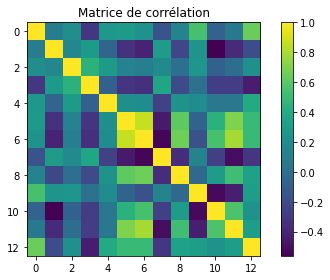

In [5]:
sigma = seq = [np.std(x) for x in Xt]
i_sigma = [1./s for s in sigma]
D_sigma = i_sigma * np.identity(d)
Z = np.matmul (Y, D_sigma)
R = np.matmul (np.matmul(D_sigma, V), D_sigma)
plt.imshow(R)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.colorbar();

### Inertie du nuage de points
 $M$ est une matrice symétrique définie positive correspondant à la métrique
 
- Si $M=D^2_{1/\sigma}$ on calcule $ \frac{1}{n}\displaystyle\sum_{i=1}^n (e_i - g)^T M (e_i-g) = \frac{1}{n}\displaystyle\sum_{i=1}^n (y_i)^T M y_i = Tr(VM)$  

- Si $M=I$ on calcule $ \frac{1}{n}\displaystyle\sum_{i=1}^n (z_i)^T M z_i = Tr(RM)$

In [6]:
def calcul_inertie_somme (Y, M):
    inertie = 0
    for i in range(n):
        inertie += np.matmul(np.transpose(Y[i]), np.matmul(M, Y[i])) 
    return inertie / n
    
def calcul_inertie_trace (V, M):
    return np.trace (np.matmul (V, M))

# Si les données sont centrées mais pas encore réduites  on travaille avec Y et V
M = np.matmul(D_sigma, D_sigma)
print (calcul_inertie_somme(Y, M))
print (calcul_inertie_trace(V, M))

# Si les données sont centrées réduites, on travaille avec Z et R
M = np.identity(p)
print (calcul_inertie_somme(Z, M))
print (calcul_inertie_trace(R, M))

12.999999999999995
13.000000000000004


NameError: name 'p' is not defined

## Analyse spectrale

In [ ]:
eigenvalues,eigenvectors = np.linalg.eig(R)
eigenvalues = sorted(eigenvalues, reverse=True)
u = [eigenvectors[:,i] for i in range(d)]

### Calcul des composantes principales

In [ ]:
c = []
for j in range(d):
    c.append(np.matmul (Z, u[j]))

### Pourcentage d'inertie expliquée par un axe
Pourcentage d'inertie cumulée expliquée par les $k$ premiers axes : $\frac{\displaystyle\sum_{j=1}^k\lambda_j}{\displaystyle\sum_{j=1}^d\lambda_j}$

In [ ]:
i_lambda = [l/d for l in eigenvalues]
i_cum = np.cumsum(eigenvalues)/d
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.arange(1,d+1),i_lambda)
plt.title('Valeurs propres')
plt.subplot(122)
plt.plot(np.arange(1,d+1),i_cum)
plt.title('% de variance expliquée');
plt.tight_layout()

### Critère de Kaiser

In [ ]:
nb_l = np.sum(np.array(eigenvalues)>1)
print ("On retient " + str(nb_l) + " axes")

## Analyse des résultats

### Corrélation variables/facteurs

In [ ]:
r = []
for j in range(d):
    r.append(np.sqrt(eigenvalues[j]) * u[j])

### Cercle des corrélations pour un couple de composantes principales
Pour $c_1$ et $c_2$, chaque variable $x_j$ est repérée par un point d'abscisse $r(c_1,x^j)$ et d'ordonnée $r(c_2, x_j)$.

In [ ]:
i1 = i_lambda[0] * 100
i2 = i_lambda[1] * 100
i3 = i_lambda[2] * 100
i12 = i1 + i2
i13 = i1 + i3
i23 = i2 + i3


plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.title('CP1/CP2 (%.2f' % i12 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 2 (%.2f' % i2 + '% d\'inertie)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axhline(0)
plt.axvline(0)
plt.gca().add_patch(plt.Circle((0,0), radius= 1, facecolor='none', edgecolor='r'))
plt.scatter(r[0], r[1])
for i, txt in enumerate(variables):
    plt.annotate(txt, (r[0][i], r[1][i]))

plt.subplot(132)
plt.title('CP1/CP3 (%.2f' % i13 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axhline(0)
plt.axvline(0)
plt.gca().add_patch(plt.Circle((0,0), radius= 1, facecolor='none', edgecolor='r'))
plt.scatter(r[0], r[2])
for i, txt in enumerate(variables):
    plt.annotate(txt, (r[0][i], r[2][i]))
    
plt.subplot(133)
plt.title('CP2/CP3 (%.2f' % i23 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i2 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axhline(0)
plt.axvline(0)
plt.gca().add_patch(plt.Circle((0,0), radius= 1, facecolor='none', edgecolor='r'))
plt.scatter(r[1], r[2])
for i, txt in enumerate(variables):
    plt.annotate(txt, (r[1][i], r[2][i]))
plt.tight_layout()

### Contribution des variables

In [ ]:
contributions_variables = []
for i in range (d):
    line = []
    for j in range (d):
        line.append(np.transpose(u)[i][j]*np.transpose(u)[i][j])
    contributions_variables.append(line)
print (print_tab (d, d, variables, contributions_variables))

### Représentation des individus

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.title('CP1/CP2 (%.2f' % i12 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 2 (%.2f' % i2 + '% d\'inertie)')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(0)
plt.axvline(0)
plt.scatter(c[0], c[1])
for i, txt in enumerate(ind):
    plt.annotate(txt, (c[0][i], c[1][i]))

plt.subplot(132)
plt.title('CP1/CP3 (%.2f' % i13 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(0)
plt.axvline(0)
plt.scatter(c[0], c[2])
for i, txt in enumerate(ind):
    plt.annotate(txt, (c[0][i], c[2][i]))
    
plt.subplot(133)
plt.title('CP2/CP3 (%.2f' % i23 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i2 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(0)
plt.axvline(0)
plt.scatter(c[1], c[2])
for i, txt in enumerate(ind):
    plt.annotate(txt, (c[1][i], c[2][i]))
plt.tight_layout()

### Contribution des individus
$\frac{p_ic_{ki}^2}{\lambda_k}$

In [ ]:
contributions_individus = []
for i in range (n):
    line = []
    for k in range (d):
        val = (np.transpose(c)[i][k]*np.transpose(c)[i][k]) / (n * eigenvalues[k]) 
        line.append(val)
    contributions_individus.append(line)
    
print (print_tab (n, d, ind, contributions_individus))

### Tableau des cosinus carrés
$\frac{c_{ki}^2}{\displaystyle\sum_{j=1}^d c_{ji}^2}$

In [ ]:
cosinus_carres = []
c = np.array(c)

for i in range(n):
    line = []
    # on prend la représentation de l'individu i sur chacune des composantes
    tot = np.sum([x*x for x in c[:,i]])
    for k in range(d):
        line.append(c[:,i][k]*c[:,i][k]/tot)
    cosinus_carres.append(line)

print (print_tab (n, d, ind, cosinus_carres))